# Phase - 1: Data analysis & preparation


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Viewing the data


In [3]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
df.shape

(1190, 12)

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [8]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Correlations and data distribution


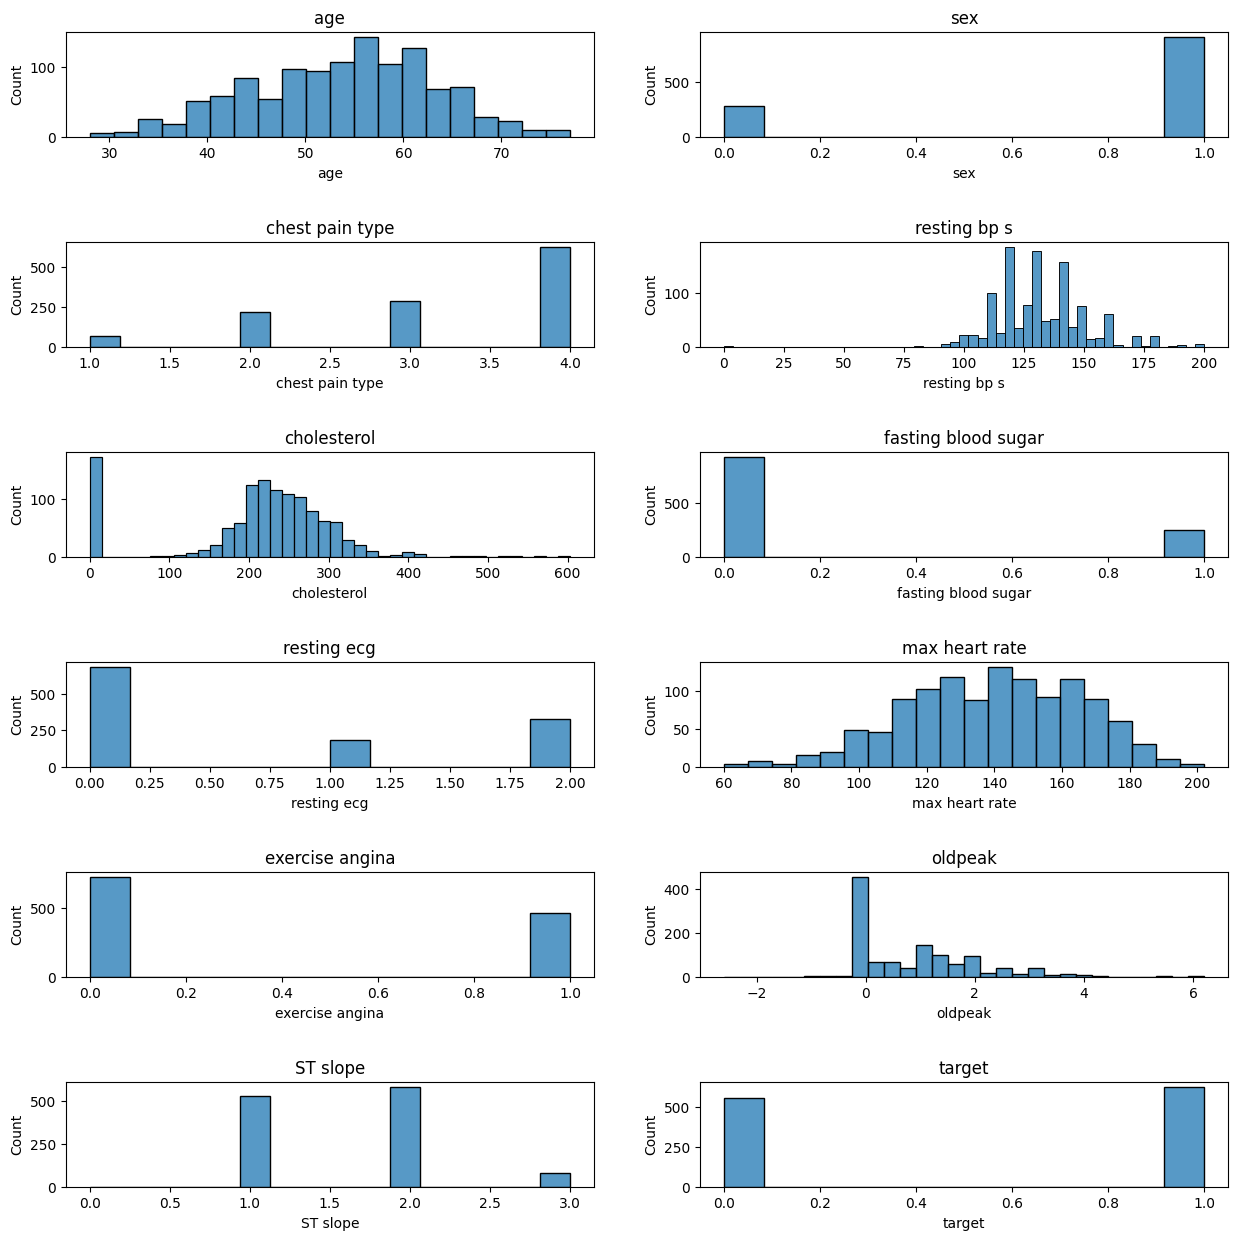

In [9]:
plt.figure(figsize=(15,15))
plt_index = 1
for c_name, content in df.items():
  ax = plt.subplot(6,2, plt_index)
  plt.subplots_adjust(hspace = 1)
  sns.histplot(content, ax=ax)
  plt.title(c_name)
  plt_index += 1

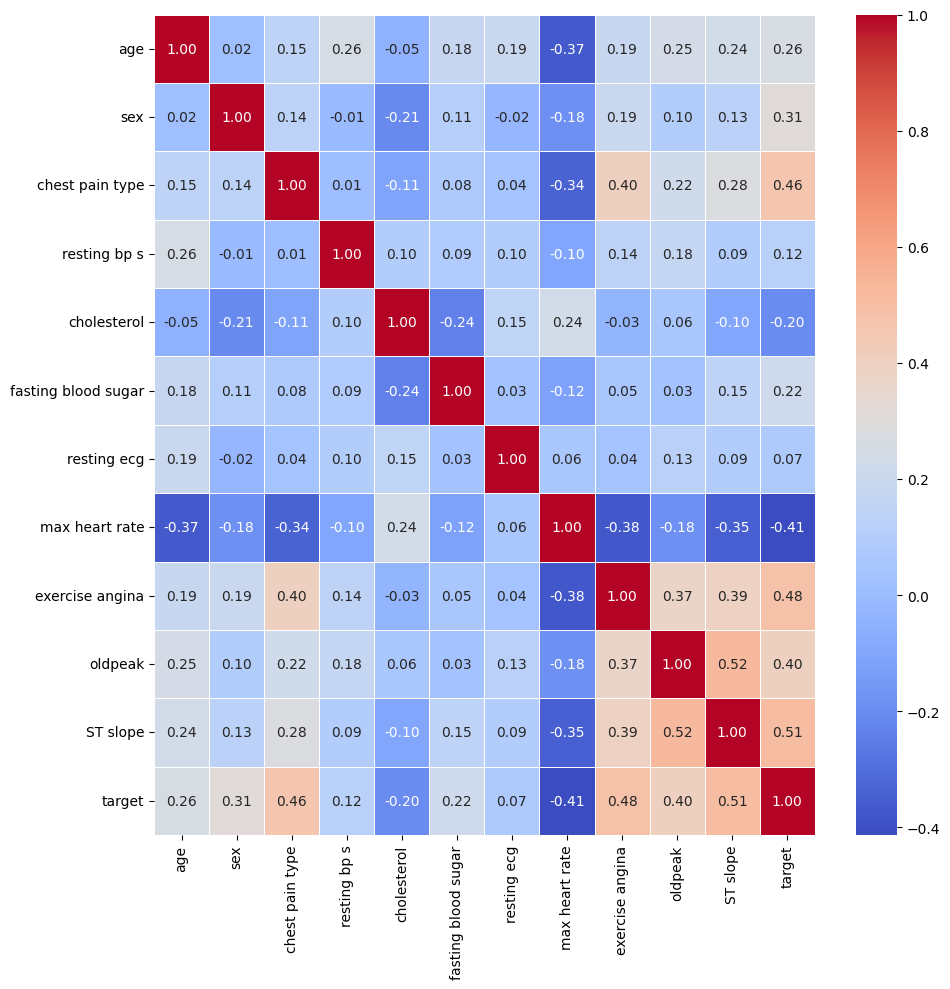

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [11]:
df["target"].value_counts()

,count
target,
1,629
0,561


## Shuffle, np conversion, and splitting

In [12]:
# set numpy print options
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [13]:
# convert DF to numpy array for normalizing
np_data = df.to_numpy()
np_data[:5, :]

array([[ 40.00,  1.00,  2.00,  140.00,  289.00,  0.00,  0.00,  172.00,
         0.00,  0.00,  1.00,  0.00],
       [ 49.00,  0.00,  3.00,  160.00,  180.00,  0.00,  0.00,  156.00,
         0.00,  1.00,  2.00,  1.00],
       [ 37.00,  1.00,  2.00,  130.00,  283.00,  0.00,  1.00,  98.00,
         0.00,  0.00,  1.00,  0.00],
       [ 48.00,  0.00,  4.00,  138.00,  214.00,  0.00,  0.00,  108.00,
         1.00,  1.50,  2.00,  1.00],
       [ 54.00,  1.00,  3.00,  150.00,  195.00,  0.00,  0.00,  122.00,
         0.00,  0.00,  1.00,  0.00]])

In [14]:
import random
np.random.shuffle(np_data)

In [15]:
# just checking shuffle
np_data[:5, :]

array([[ 62.00,  1.00,  4.00,  110.00,  0.00,  0.00,  0.00,  120.00,
         1.00,  0.50,  2.00,  1.00],
       [ 58.00,  1.00,  4.00,  146.00,  218.00,  0.00,  0.00,  105.00,
         0.00,  2.00,  2.00,  1.00],
       [ 35.00,  1.00,  2.00,  110.00,  257.00,  0.00,  0.00,  140.00,
         0.00,  0.00,  2.00,  1.00],
       [ 55.00,  1.00,  2.00,  130.00,  262.00,  0.00,  0.00,  155.00,
         0.00,  0.00,  1.00,  0.00],
       [ 34.00,  1.00,  2.00,  98.00,  220.00,  0.00,  0.00,  150.00,
         0.00,  0.00,  1.00,  0.00]])

In [16]:
# integer for splitting the data in the next steps
index_20percent = int(0.2 * len(np_data[:, 0]))
index_20percent

238

In [17]:
# remove last column (target)
XVALID = np_data[:index_20percent, :-1]
YVALID = np_data[:index_20percent, -1]

XTRAIN = np_data[index_20percent:, :-1]
YTRAIN = np_data[index_20percent:, -1]

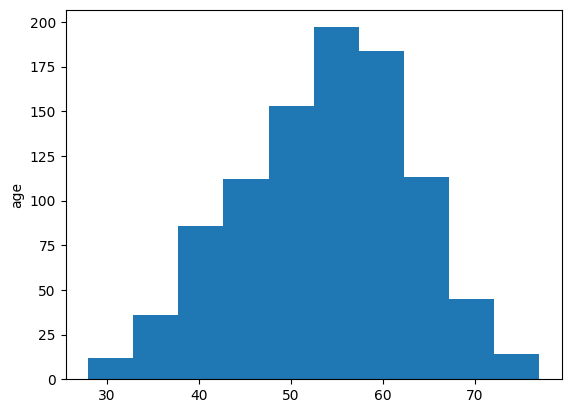

In [18]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('age')
plt.show()

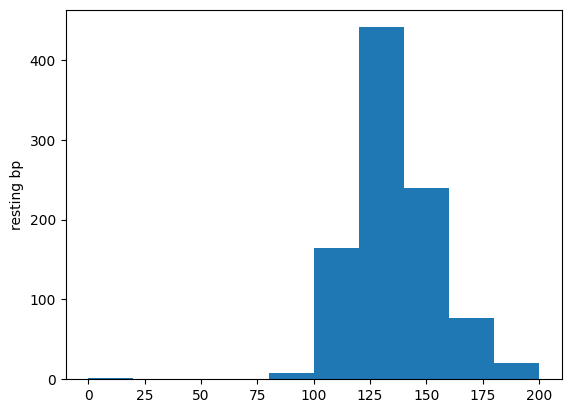

In [19]:
plt.hist(XTRAIN[:, 3])
plt.ylabel('resting bp')
plt.show()

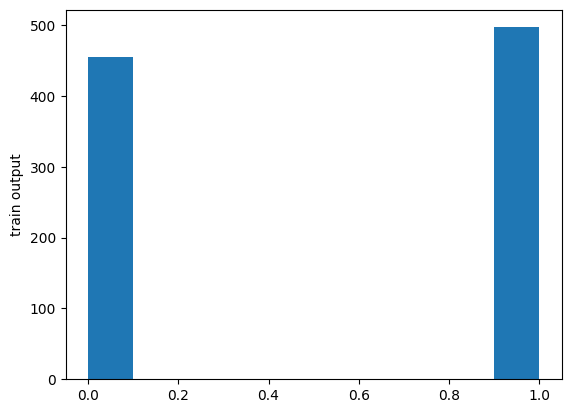

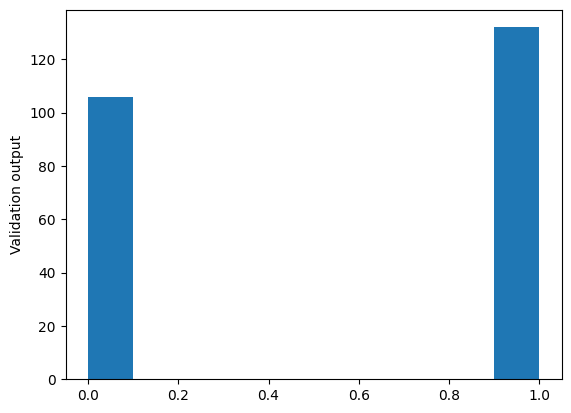

In [20]:
plt.hist(YTRAIN)
plt.ylabel('train output')
plt.show()

plt.hist(YVALID)
plt.ylabel('Validation output')
plt.show()

In [21]:
mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)

XTRAIN -= mean
XTRAIN /= std

XVALID -= mean
XVALID /= std

In [22]:
print(mean)
print(std)

[ 53.71  0.77  3.22  132.38  210.97  0.22  0.69  140.21  0.38  0.91  1.61]
[ 9.42  0.42  0.94  18.52  99.34  0.41  0.87  25.37  0.48  1.10  0.60]


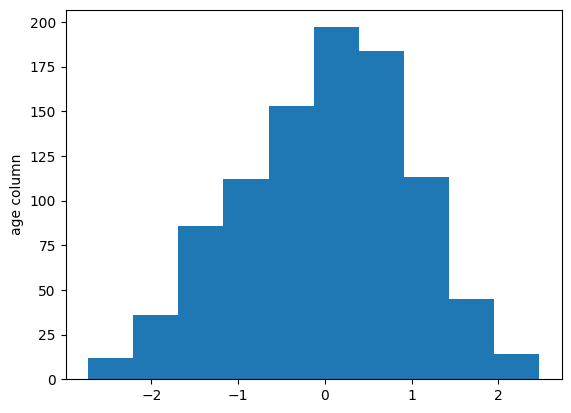

In [23]:
# verify the values are normalize between 0 and 1
plt.hist(XTRAIN[:, 0])
plt.ylabel('age column')
plt.show()

# Phase - 2: Intentional Overfit
- For this phase **do not** split data into training and validation


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [25]:
X = np_data[:, :-1]
Y = np_data[:, -1]

In [26]:
print(X.shape, Y.shape)
print(X.shape[1])

(1190, 11) (1190,)
11


## Overfit with 1 neuron (No overfit ~83% acc)
- 256 epochs

In [27]:
# set up network architecture
model = Sequential(name="overfit_one_neuron")
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [28]:
model.fit(X, Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2735 - loss: 1.2421   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2944 - loss: 1.1415 
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3032 - loss: 1.0771 
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3678 - loss: 0.9798 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4118 - loss: 0.8900 
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4354 - loss: 0.8312 
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4868 - loss: 0.7648 
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5714 - loss: 0.7032 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6440 - loss: 0.6319 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 0.6008
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7299 - loss: 0.5645 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## Overfit with a 2x1 network (No overfit ~85% acc)
- 256 epochs

In [29]:
# add more neurons
overfit_model = Sequential(name="overfit_2x1")
overfit_model.add(Input(shape=(X.shape[1],)))
overfit_model.add(Dense(2, activation='relu'))
overfit_model.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
overfit_model.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5077 - loss: 0.7054
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 0.7026
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5454 - loss: 0.6821
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5784 - loss: 0.6653
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 0.6353
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - loss: 0.6280
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.5974
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7129 - loss: 0.5774 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7252 - loss: 0.5583 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.5645
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7646 - loss: 0.5322 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

## Overfit with 8x1 network (No overfit ~90% acc)
- 256 epochs

In [31]:
# add more neurons
overfit_model_2 = Sequential(name="overfit_8x1")
overfit_model_2.add(Input(shape=(X.shape[1],)))
overfit_model_2.add(Dense(8, activation='relu'))
overfit_model_2.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_2.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6761 - loss: 0.6018   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7274 - loss: 0.5540 
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.5136
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7739 - loss: 0.4811 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.4478 
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4540
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4262 
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4307 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4384 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.3818 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.3977 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

## Overfit 8x4x1 (No overfit ~90% acc)
- 256 epochs

In [32]:
# add more neurons and another layer
overfit_model_3 = Sequential(name="overfit_8x4x1")
overfit_model_3.add(Input(shape=(X.shape[1],)))
overfit_model_3.add(Dense(8, activation='relu'))
overfit_model_3.add(Dense(4, activation='relu'))
overfit_model_3.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_3.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7175 - loss: 0.6727
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.6523
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.6283
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.5903
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.5626
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.5315
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 0.4961  
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4970 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8141 - loss: 0.4567 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4503
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.4214 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

## Overfit 64x4x1 (success)
- 256 epochs

In [33]:
# add more neurons to first layer
overfit_model_4 = Sequential(name="overfit_64x4x1")
overfit_model_4.add(Input(shape=(X.shape[1],)))
overfit_model_4.add(Dense(64, activation='relu'))
overfit_model_4.add(Dense(4, activation='relu'))
overfit_model_4.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_4.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6440 - loss: 0.6063   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4374 
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8065 - loss: 0.3979 
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.3824 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.3738 
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8409 - loss: 0.3669 
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8491 - loss: 0.3490 
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8376 - loss: 0.3605 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.3285 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8578 - loss: 0.3218 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.3161 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

## Overfit 64x32x1 (success)
- 100 epochs

In [34]:
# add more neurons
overfit_model_5 = Sequential(name="overfit_64x32x1")
overfit_model_5.add(Input(shape=(X.shape[1],)))
overfit_model_5.add(Dense(64, activation='relu'))
overfit_model_5.add(Dense(32, activation='relu'))
overfit_model_5.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_5.fit(X,Y, epochs=100, verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7737 - loss: 0.5510
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.4010 
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.3715 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.3858 
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.3402
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.3122 
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8765 - loss: 0.3217 
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3345 
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8898 - loss: 0.3070
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8819 - loss: 0.3149 
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8788 - loss: 0.3058 
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

## Overfit 500x1 (success)
- 256 epochs

In [35]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(500, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7841 - loss: 0.5033
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.3622
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3571
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.3596
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3315
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3179
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3408
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3349
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.2980
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3071 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8816 - loss: 0.2924 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [36]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4905 - loss: 0.6753
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5914 - loss: 0.6306
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7524 - loss: 0.6046
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.5758
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.5710
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8430 - loss: 0.5263
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.5038
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8296 - loss: 0.4807
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4762
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8404 - loss: 0.4497 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.4321
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

# Phase 3 - Model selection & evaluation
- Goal: obtain highest possible acc on validation set

In [37]:
from tensorflow.keras.metrics import Precision, Recall, F1Score

In [38]:
# double check train and validation sets
print(XTRAIN.shape, YTRAIN.shape)
print(XVALID.shape, YVALID.shape)

(952, 11) (952,)
(238, 11) (238,)


## Create metric classes and model callbacks
- Accuracy, Precision, Recall, F1Score

In [39]:
prec = Precision()
rec = Recall()
f1 = F1Score()

In [76]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath = 'model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')

## Create a neural network logistic regression model
- One output neuron with sigmoid
- val_accuracy: 0.8319
- val_loss: 0.3709
- val_precision: 0.8382
- val_recall: 0.8636

In [77]:
baseline_regression_model = Sequential(name="baseline_regression_model")
baseline_regression_model.add(Input(shape=(X.shape[1],)))
baseline_regression_model.add(Dense(1, activation='sigmoid'))
# compile the model
baseline_regression_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])


In [78]:
history = baseline_regression_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 26s 917ms/step - accuracy: 0.5625 - loss: 0.6676 - precision: 0.8258 - recall: 0.8533
Epoch 1: val_loss improved from inf to 0.89114, saving model to model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5131 - loss: 0.8449 - precision: 0.6483 - recall: 0.6705 - val_accuracy: 0.4580 - val_loss: 0.8911 - val_precision: 0.5161 - val_recall: 0.3636
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5625 - loss: 0.9381 - precision: 0.4286 - recall: 0.8182
Epoch 2: val_loss improved from 0.89114 to 0.84652, saving model to model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4923 - loss: 0.8805 - precision: 0.5002 - recall: 0.5080 - val_accuracy: 0.5084 - val_loss: 0.8465 - val_precision: 0.5714 - val_recall: 0.4545
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4062 - loss: 0.8495 - precision: 0.5000 - recall: 0.4211
Epoch 3: val_loss improved from 0.84652 to 0.80418, saving model to model.kera

## Model 16x8x1
- val_accuracy: 0.8908
- val_loss: 0.3069
- val_precision: 0.9015
- val_recall: 0.9015

In [79]:
three_layer_model = Sequential(name="16x8x1_model")
three_layer_model.add(Input(shape=(X.shape[1],)))
three_layer_model.add(Dense(16, activation='relu'))
three_layer_model.add(Dense(8, activation='relu'))
three_layer_model.add(Dense(1, activation='sigmoid'))
# compile the model
three_layer_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
three_layer_history = three_layer_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4229 - loss: 0.7357 - precision: 0.6359 - recall: 0.6301
Epoch 1: val_loss did not improve from 0.36907
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4438 - loss: 0.7262 - precision: 0.6214 - recall: 0.6260 - val_accuracy: 0.6134 - val_loss: 0.6641 - val_precision: 0.6190 - val_recall: 0.7879
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 16s 563ms/step - accuracy: 0.6250 - loss: 0.6520 - precision: 0.6000 - recall: 0.7500
Epoch 2: val_loss did not improve from 0.36907
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6384 - loss: 0.6340 - precision: 0.6171 - recall: 0.8078 - val_accuracy: 0.6723 - val_loss: 0.5942 - val_precision: 0.6588 - val_recall: 0.8485
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7188 - loss: 0.5604 - precision: 0.6800 - recall: 0.9444
Epoch 3: val_loss did not improve from 0.36907
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5648 - precision: 0.6863 -

## Model 8x1
- val_accuracy: 0.8193
- val_loss: 0.3666
- val_precision: 0.8346
- val_recall: 0.8409

In [80]:
eightx1_model = Sequential(name="8x1_model")
eightx1_model.add(Input(shape=(X.shape[1],)))
eightx1_model.add(Dense(8, activation='relu'))
eightx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
eightx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
eightx1_history = eightx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5552 - loss: 0.6981 - precision: 0.7770 - recall: 0.6056
Epoch 1: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5700 - loss: 0.6870 - precision: 0.7735 - recall: 0.5900 - val_accuracy: 0.6933 - val_loss: 0.5944 - val_precision: 0.7757 - val_recall: 0.6288
Epoch 2/256
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.5977 - precision: 0.7098 - recall: 0.5915   
Epoch 2: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6786 - loss: 0.5929 - precision: 0.7235 - recall: 0.6042 - val_accuracy: 0.7605 - val_loss: 0.5308 - val_precision: 0.8319 - val_recall: 0.7121
Epoch 3/256
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5547 - precision: 0.7616 - recall: 0.6688  
Epoch 3: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7134 - loss: 0.5484 - precision: 0.7648 

## Model 4x1
- val_accuracy: 0.8361
- val_loss: 0.4390
- val_precision: 0.8298
- val_recall: 0.8864

In [81]:
fourx1_model = Sequential(name="4x1_model")
fourx1_model.add(Input(shape=(X.shape[1],)))
fourx1_model.add(Dense(4, activation='relu'))
fourx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
fourx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
fourx1_history = fourx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 28s 975ms/step - accuracy: 0.2500 - loss: 0.9085 - precision: 0.7905 - recall: 0.7697
Epoch 1: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3847 - loss: 0.8109 - precision: 0.5945 - recall: 0.5747 - val_accuracy: 0.4160 - val_loss: 0.7675 - val_precision: 0.4660 - val_recall: 0.3636
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.5000 - loss: 0.7093 - precision: 0.8000 - recall: 0.4800
Epoch 2: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4988 - loss: 0.7435 - precision: 0.5516 - recall: 0.4991 - val_accuracy: 0.4748 - val_loss: 0.7203 - val_precision: 0.5340 - val_recall: 0.4167
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5625 - loss: 0.6247 - precision: 0.7143 - recall: 0.5000
Epoch 3: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.6794 - precision: 0.5973

## Model 2x1
- val_accuracy: 0.8277
- val_loss: 0.4333
- val_precision: 0.8273
- val_recall: 0.8712

In [82]:
twox1_model = Sequential(name="2x1_model")
twox1_model.add(Input(shape=(X.shape[1],)))
twox1_model.add(Dense(2, activation='relu'))
twox1_model.add(Dense(1, activation='sigmoid'))
# compile the model
twox1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
twox1_history = twox1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 28s 980ms/step - accuracy: 0.3438 - loss: 0.8969 - precision: 0.7933 - recall: 0.8095
Epoch 1: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3110 - loss: 0.9252 - precision: 0.5406 - recall: 0.5068 - val_accuracy: 0.3571 - val_loss: 0.8111 - val_precision: 0.3871 - val_recall: 0.2727
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.2188 - loss: 0.9397 - precision: 0.1818 - recall: 0.1111
Epoch 2: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2940 - loss: 0.8883 - precision: 0.3000 - recall: 0.2482 - val_accuracy: 0.3824 - val_loss: 0.7721 - val_precision: 0.4138 - val_recall: 0.2727
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2500 - loss: 0.8555 - precision: 0.3333 - recall: 0.2000
Epoch 3: val_loss did not improve from 0.30315
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3539 - loss: 0.8176 - precision: 0.3677

In [83]:
twox1_history.params

{'verbose': 1, 'epochs': 256, 'steps': 30}

## Plot learning curves

In [84]:
def plot_learning_curves(history, title):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title(title)
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()

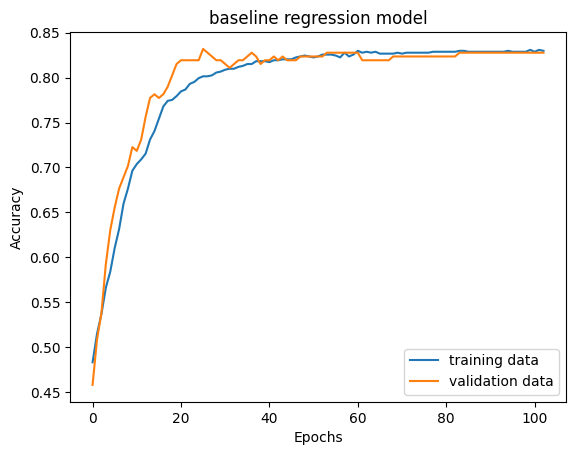

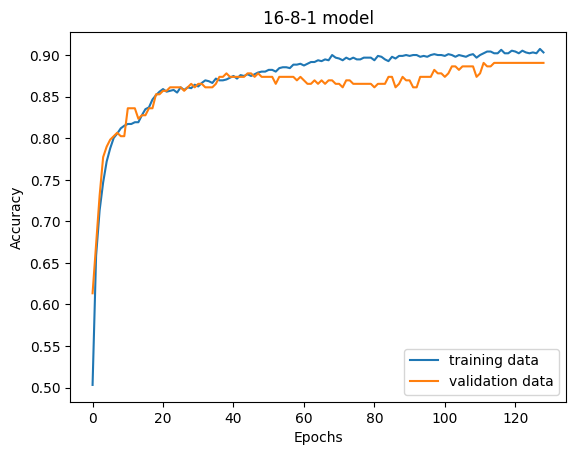

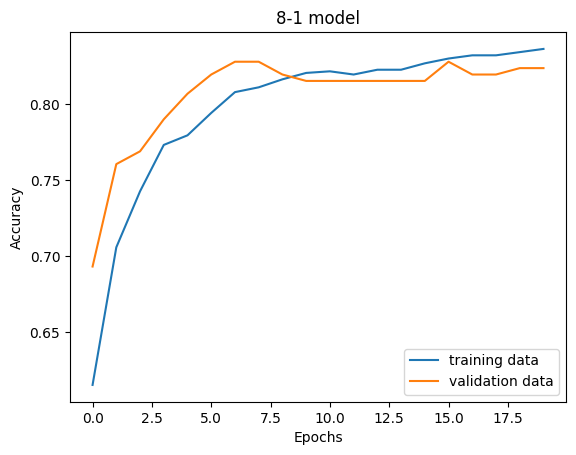

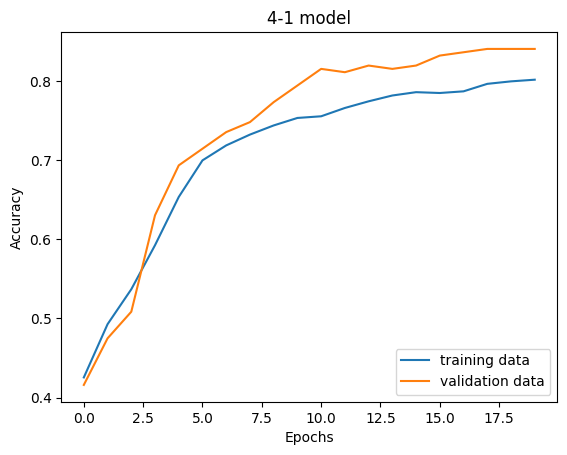

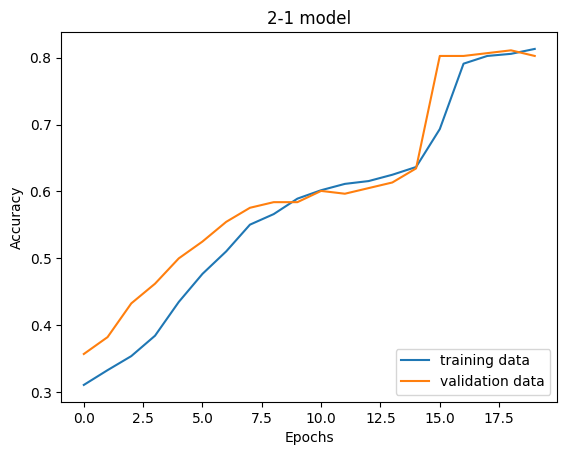

In [85]:
plot_learning_curves(history, "baseline regression model")
plot_learning_curves(three_layer_history, "16-8-1 model")
plot_learning_curves(eightx1_history, "8-1 model")
plot_learning_curves(fourx1_history, "4-1 model")
plot_learning_curves(twox1_history, "2-1 model")

## Plot loss of best model
- 16-8-1

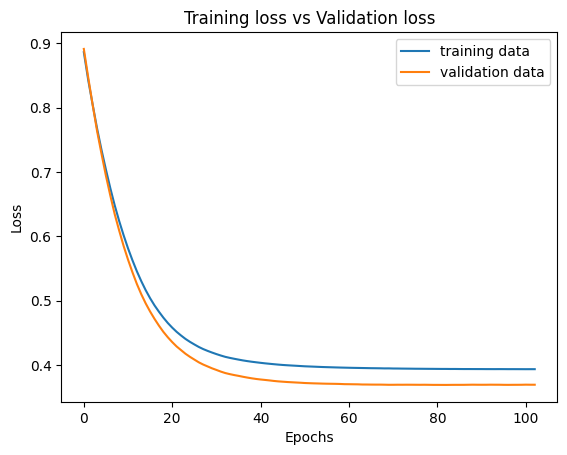

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss vs Validation loss')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

## Load best model from checkpoint file for manual predictions (GRAD student only work)
- Requirement: **build your own function/method that serves as a prediction model**
- Verify predictions are the same

In [87]:
from keras.saving import load_model
best_model = load_model('model.keras')

In [88]:
# double check it is the 16-8-1 model
best_model.name

'16x8x1_model'

In [92]:
# check the summary
best_model.summary()

Model: "16x8x1_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676 (2.64 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 339 (1.33 KB)

In [100]:
# gives us the shape of the weights (11,16) for the weight kernel and (16,) for the bias
# which makes sense since the layer is 16 neurons and input is 11 features
best_model.layers[0].weights

[<KerasVariable shape=(11, 16), dtype=float32, path=dense_54/kernel>,
 <KerasVariable shape=(16,), dtype=float32, path=dense_54/bias>]

In [145]:
from keras import activations

In [161]:
# Testing cell to see what various methods do
len(best_model.layers[0].get_weights()[0].T)

16

In [162]:
# Taken from Keras docs: output = activation(dot(input, kernel) + bias)
# used in hidden layers
def relu(x):
  return np.maximum(0,x)

# used in output layer
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def my_prediction_function(model, data):
  # this will be mutated between layers and end up as output
  output = data

  # iterate over the layers
  for keras_layer in model.layers:
    # transpose the weights and bias of current layer
    weights = keras_layer.get_weights()[0].T
    bias_list = keras_layer.get_weights()[1].T

    temporary_values = []
    for i in range(len(output)):
      neuron_outputs = [] # list to store neuron outputs
      for j in range(len(weights)):
        pre_activation = np.dot(output[i], weights[j]) + bias_list[j]

        # apply activatoin functions
        if keras_layer.activation == activations.sigmoid:
          activated_output = sigmoid(pre_activation)
        elif keras_layer.activation == activations.relu:
          activated_output = relu(pre_activation)
        else:
          activated_output = pre_activation # just linear without activation

        neuron_outputs.append(activated_output)

      temporary_values.append(neuron_outputs)
    # input for the next layer
    output = np.array(temporary_values)
  return output



## Test the manual prediction function

In [165]:
# manually using the weights and bias from the model to predict
my_prediction_function(best_model, XVALID)[:5]

array([[ 0.95],
       [ 0.89],
       [ 0.10],
       [ 0.07],
       [ 0.00]])

In [157]:
# actual model predictions
predictions = best_model.predict(XVALID)
predictions[:5].T

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 0.95,  0.89,  0.10,  0.07,  0.00]], dtype=float32)

In [166]:
# actual values from dataset
true_values = np_data[:, -1]
true_values[:5]

array([ 1.00,  1.00,  1.00,  0.00,  0.00])

In [114]:
XVALID.shape

(238, 11)